In [ ]:
#Cài đặt thư viện
import keras
from keras.models import Sequential
from glob import glob
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Kết nối driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ketqua_dudoan = {
                  0 : "NORMAL",
                  1 : "PNEUMONIA"
                }

In [ ]:
#Tải dữ liệu
train_path = "/content/drive/MyDrive/Final_project_AI/dataset_viemphoi/train"
test_path = "/content/drive/MyDrive/Final_project_AI/dataset_viemphoi/test"

In [ ]:
#Xây dựng Model
train_datagen = ImageDataGenerator(rescale=1/255,
                                    rotation_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(64, 64),
                                              batch_size=10,
                                              class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

In [ ]:
history = model.fit_generator(train_set,
                              steps_per_epoch=3800//10,
                              epochs=100,
                              validation_data=test_set,
                              validation_steps=2200//10)

<ipython-input-14-05fa2aa015bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set,


Epoch 1/100
380/380 [==============================] - ETA: 0s - loss: 0.5777 - accuracy: 0.7461

380/380 [==============================] - 562s 1s/step - loss: 0.5777 - accuracy: 0.7461 - val_loss: 0.7588 - val_accuracy: 0.6250
Epoch 2/100
380/380 [==============================] - 140s 368ms/step - loss: 0.3789 - accuracy: 0.8296
Epoch 3/100
380/380 [==============================] - 101s 267ms/step - loss: 0.3099 - accuracy: 0.8717
Epoch 4/100
380/380 [==============================] - 93s 246ms/step - loss: 0.2733 - accuracy: 0.8883
Epoch 5/100
380/380 [==============================] - 85s 223ms/step - loss: 0.2793 - accuracy: 0.8828
Epoch 6/100
380/380 [==============================] - 87s 230ms/step - loss: 0.2586 - accuracy: 0.8979
Epoch 7/100
380/380 [==============================] - 84s 221ms/step - loss: 0.2550 - accuracy: 0.8939
Epoch 8/100
380/380 [==============================] - 84s 222ms/step - loss: 0.2619 - accuracy: 0.8908
Epoch 9/100
380/380 [==============================] - 84s 220ms/step - loss: 0.2423 - accuracy: 0.9026
Epoch 10/100
380/380 [============

In [ ]:
model.save("Pneumonia.h5")

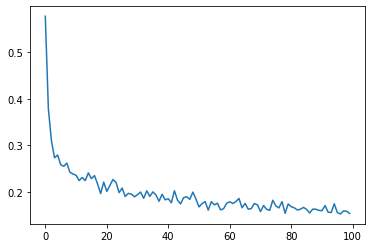

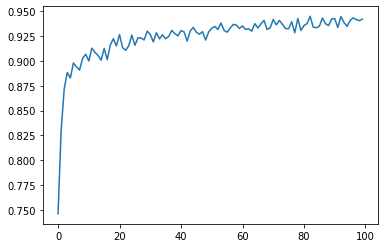

In [ ]:
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()
     

1/1 [==============================] - 0s 22ms/step
Accuracy:  99.99866485595703 %


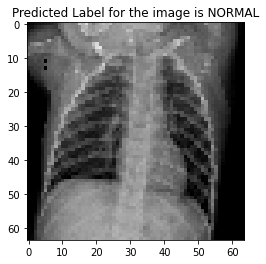

In [ ]:
img = load_img("/content/drive/MyDrive/Final_project_AI/dataset_viemphoi/val/NORMAL/NORMAL2-IM-1442-0001.jpeg",target_size=(64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(ketqua_dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print("Accuracy: ",a, '%')


1/1 [==============================] - 0s 32ms/step
Accuracy:  99.77207779884338 %


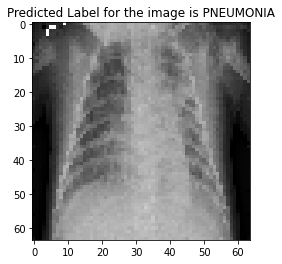

In [ ]:
img = load_img("/content/drive/MyDrive/Final_project_AI/dataset_viemphoi/val/PNEUMONIA/person1946_bacteria_4874.jpeg",target_size=(64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(ketqua_dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print("Accuracy: ",a, '%')